## Visualizing Earnings Based on College Majors 


US News released an article on the top-10 college majors that earn the highest salary. No surprise that majors in engineering are in the top 10. You can read it [here](https://www.usnews.com/education/best-colleges/paying-for-college/articles/2016-05-17/top-10-college-majors-that-earn-the-highest-salaries).

We will use a dataset based on the job outcomes of students who graduated between 2012 and 2014.  FiveThiryEight was kind enough to release the dataset profile on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors). 

## Read Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
recent_grads = pd.read_csv("data-sets/recent-grads.csv")
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


We loaded and checked the data. There does not seem to be anything out of the ordinary. We will check to see if there are any missing values in the dataset--and will drop any row containing missing values.

In [2]:
recent_grads.apply(lambda x: sum(x.isnull()))

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

In [3]:
recent_grads = recent_grads.dropna()
recent_grads.apply(lambda x: sum(x.isnull()))

Rank                    0
Major_code              0
Major                   0
Total                   0
Men                     0
Women                   0
Major_category          0
ShareWomen              0
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

In [4]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


## Data Analysis

Now that we have erased the missing values, we will do some visualizations to explore the dataset. We will hope to answer questions such as: 
* Do students in more popular majors earn more money? 
* Which majors are predominately male? Predominately female?
* What is the common median salary range?

In [5]:
#Compare the sum of genders in each Major_category
gendermajorcat = recent_grads.pivot_table(index="Major_category", values=["Men", "Women"], aggfunc="sum")
gendermajorcat

,Men,Women
Major_category,,
Agriculture & Natural Resources,40357.0,35263.0
Arts,134390.0,222740.0
Biology & Life Science,184919.0,268943.0
Business,667852.0,634524.0
Communications & Journalism,131921.0,260680.0
Computers & Mathematics,208725.0,90283.0
Education,103526.0,455603.0
Engineering,408307.0,129276.0
Health,75517.0,387713.0


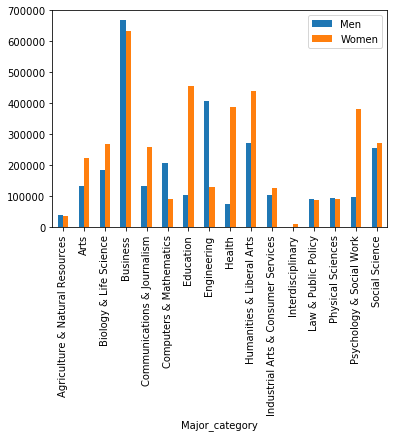

In [6]:
gendermajorcat = gendermajorcat.plot.bar(x=gendermajorcat.index, y=["Men", "Women"])
gendermajorcat

In [7]:
#Compare Major_category with Median and Total
#Then round the decimals by 2
popularmajorcat = np.round(recent_grads.pivot_table(index="Major_category", values=["Total", "Median"]), 2)
popularmajorcat

,Median,Total
Major_category,,
Agriculture & Natural Resources,35111.11,8402.22
Arts,33062.50,44641.25
Biology & Life Science,36421.43,32418.71
Business,43538.46,100182.77
Communications & Journalism,34500.00,98150.25
Computers & Mathematics,42745.45,27182.55
Education,32350.00,34945.56
Engineering,57382.76,18537.34
Health,36825.00,38602.50


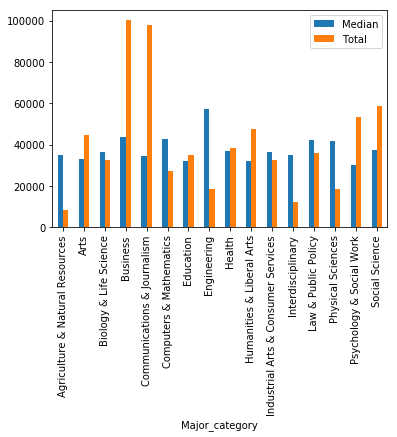

In [8]:
popularmajorcat.plot.bar(x=popularmajorcat.index, y=["Median", "Total"])

(array([ 24.,  75.,  40.,  18.,  11.,   2.,   1.,   0.,   0.,   1.]),
 array([  22000.,   30800.,   39600.,   48400.,   57200.,   66000.,
          74800.,   83600.,   92400.,  101200.,  110000.]),
 <a list of 10 Patch objects>)

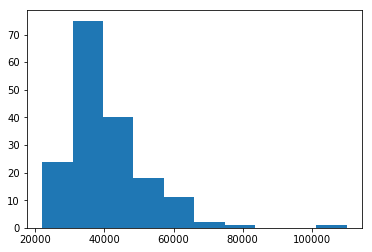

In [9]:
plt.hist(recent_grads["Median"])

## Findings

Based on the dataset, students in popular majors do not necessarily earn more in income. This indicator could be the reason as to why the \$30,000 ~ $40,000 is the most common median salary range.   

It seems that men are predominately major in Computer Science & Mathematics and Engineering while there are a greater number of women who major in Liberal Arts, Health, Education, Psychology & Social Work, and Journalism & Communications. 

Since women predominate in primary categories that deal with communications, let's look at the share of females in the top-10 and bottom-10 college major ranks.

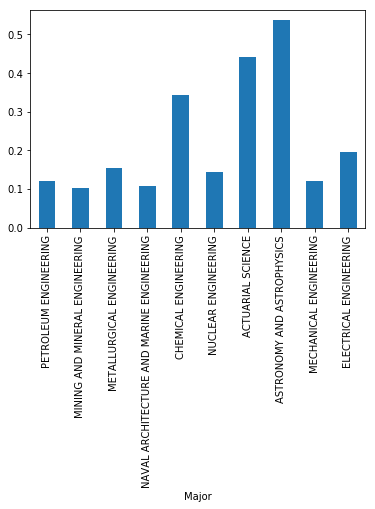

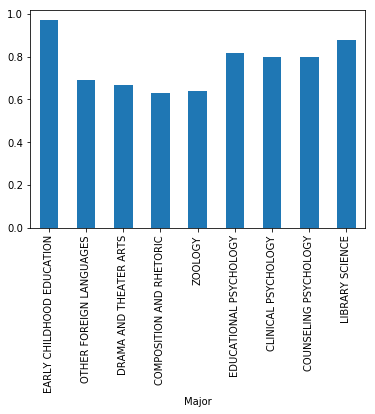

In [11]:
recent_grads[:10].plot.bar(x="Major", y="ShareWomen", legend=False)
recent_grads[163:].plot.bar(x="Major", y="ShareWomen", legend=False)